# Hypotheses and Outline

This study aims to explore the socio-economic and educational factors influencing voting patterns across different U.S. counties. Using a dataset sourced from Kaggle, which compiles data from the 2020 Presidential Election, Harvard Dataverse, and the USDA Economic Research Service, we focus on variables such as unemployment rate, median income, urban influence codes, and education levels. These variables provide a comprehensive foundation for understanding the interplay between socio-economic conditions and political preferences in diverse county-level populations.

##### Hypotheses
  - Urban Influence Affects Voting Patterns: Urbanization level plays the greatest role in which party wins a county
  - Median Income Affects Voting Patterns: Median Income plays the greatest role in which party wins a county


##### Analytical Plan
-   Data Preprocessing: Split the dataset into training, testing, and validation sets using a 50/25/25 ratio.
-   Model Selection: Evaluate logistic regression, LDA, Random Forest, and Naive Bayes classifiers for predictive analysis.
-   Model Evaluation: Assess model performance using metrics such as AUC, ROC, F1 scores, log score, brier score, gini impurity scores, and calibration plots.
-   Hypothesis Testing: Use insights from predictive models to validate hypotheses by analyzing variable importance and observing patterns in the data.

##### Using Results to Validate Hypotheses

The performance metrics from the models, such as accuracy and calibration scores, will enable us to evaluate the relationship between predictor variables and outcomes. For example:

-   The distinction in voting patterns based on urban influence will be evident if model calibration indicates significant predictive contributions from urban influence codes.
-   Correlations between income inequality and voting patterns will be validated if income-related features show strong predictive weight.


## Importing Libraries


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import brier_score_loss
from sklearn.metrics import log_loss
from sklearn.preprocessing import LabelEncoder



In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import IPython.display
%cd  /content/drive/Shareddrives/STAT335_Project/

Mounted at /content/drive
/content/drive/Shareddrives/STAT335_Project


### Loading Dataset


In [ ]:
df = pd.read_csv('socioeconomic_voting.csv')
df.head()

,State,County Name,FIPS,Unemployment Rate 2020,County Median Household Income (2021),Urban Influence Code 2013,County Income Percentile Within State (2021),Bachelor's Degree or Higher Percentage (2018-2022),Party,Vote Percentage
0,ALABAMA,AUTAUGA,1001,5.3,66444.0,2.0,0.955224,29.6,REPUBLICAN,71.436802
1,ALABAMA,BALDWIN,1003,6.1,65658.0,2.0,0.940299,32.6,REPUBLICAN,76.171373
2,ALABAMA,BARBOUR,1005,7.7,38649.0,6.0,0.164179,11.9,REPUBLICAN,53.451226
3,ALABAMA,BIBB,1007,7.3,48454.0,1.0,0.611940,10.9,REPUBLICAN,78.426264
4,ALABAMA,BLOUNT,1009,4.5,56894.0,1.0,0.895522,14.7,REPUBLICAN,89.571553


# Describing the Data


Our population of interest are the different counties in the United States. The dataset includes variables such as unemployment rates, median household income, urban influence codes, education levels, and voting percentages for the 2020 U.S. presidential election. The urban influence codes are from 2013, the median income is from 2021, the income percentile within state is from 2021, and the education level is from 2018-2022.

The dataset was found on [Kaggle](https://www.kaggle.com/datasets/adamcuculich/county-socioeconomic-education-and-voting-data), and the [Harvard Datavere](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ) and the [USDA Economic Research Service](https://www.ers.usda.gov/data-products/county-level-data-sets/county-level-data-sets-download-data/) were used as references to construct this dataset




# Data Visualization & EDA

In [ ]:
print("Summary Statistics")
df.describe()

Summary Statistics


,FIPS,Unemployment Rate 2020,County Median Household Income (2021),Urban Influence Code 2013,County Income Percentile Within State (2021),Bachelor's Degree or Higher Percentage (2018-2022),Vote Percentage
count,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000,3115.000000
mean,30624.118780,6.729727,58852.584912,5.227287,0.508261,23.492970,63.351835
std,15003.754786,2.271373,15249.035244,3.475443,0.288880,10.072071,15.663261
min,1001.000000,1.600000,25653.000000,1.000000,0.003937,0.000000,19.649967
25%,19034.000000,5.200000,48972.000000,2.000000,0.257963,16.500000,52.987445
50%,29205.000000,6.600000,56567.000000,5.000000,0.507463,20.900000,65.133424
75%,46004.000000,8.000000,65536.500000,8.000000,0.758621,27.900000,75.898047
max,56045.000000,22.600000,153716.000000,12.000000,1.000000,78.900000,96.181818


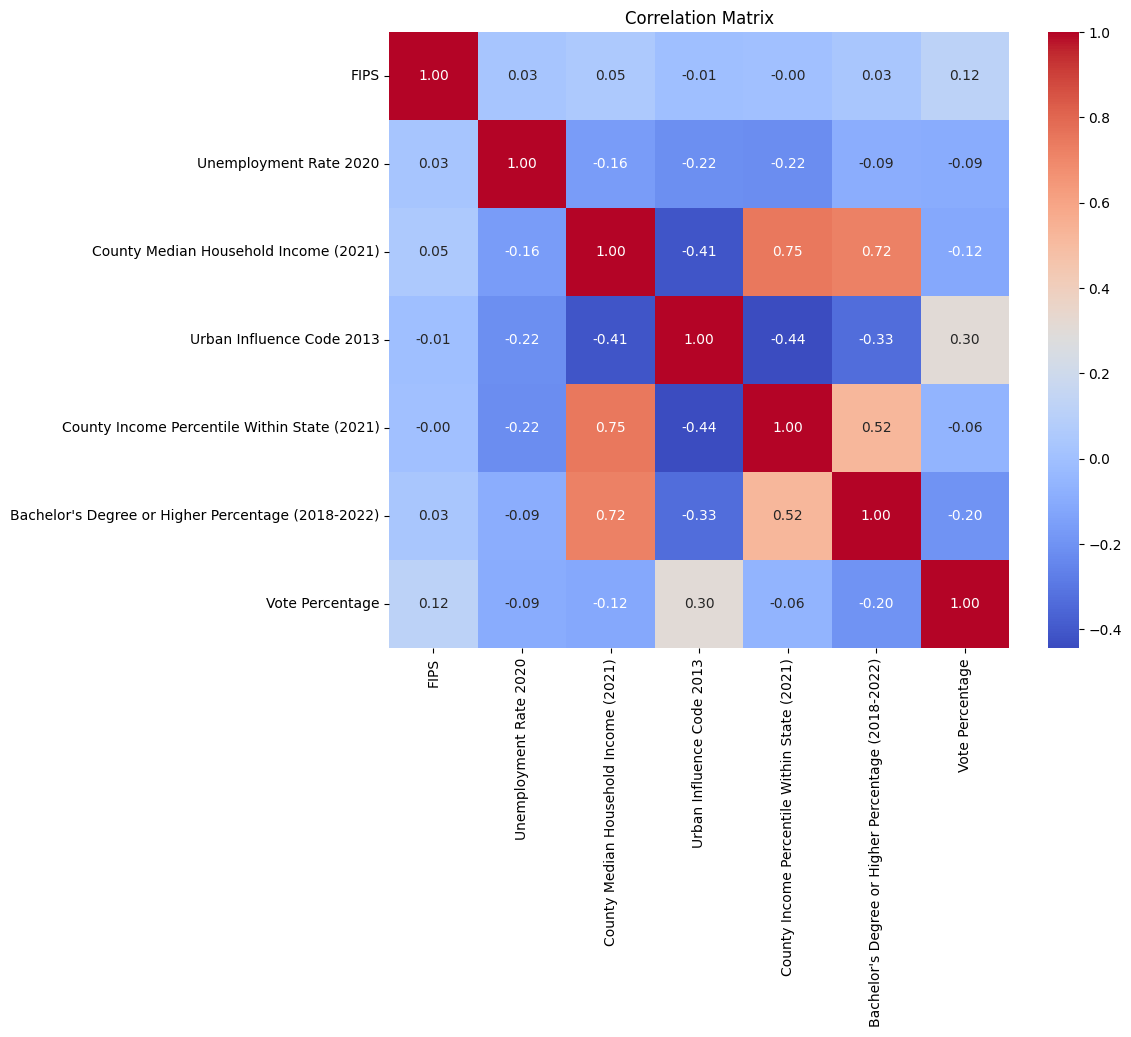

In [ ]:
#Correlation Matrix
numerical_df = df.select_dtypes(include=['number'])
corr_matrix = numerical_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


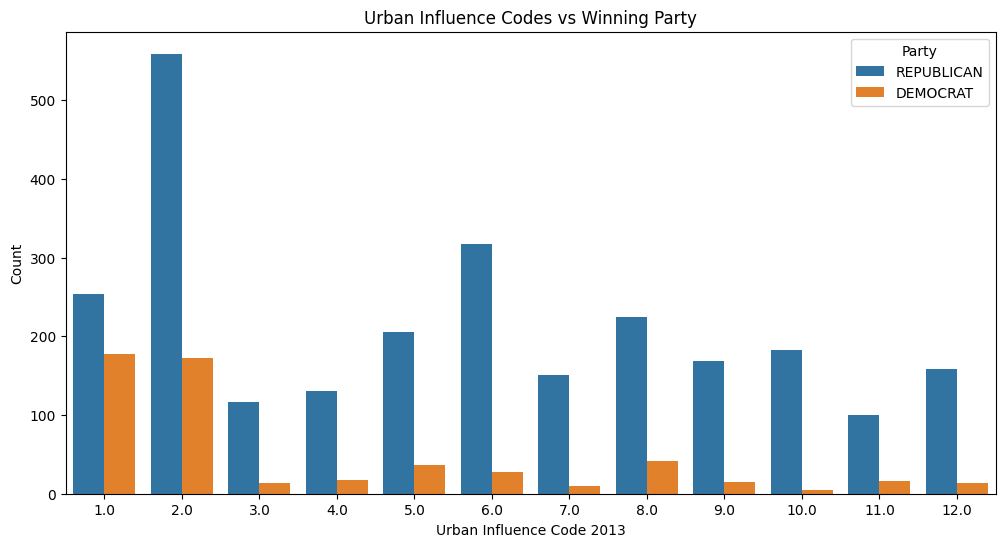

In [ ]:
#Visualizing Urban Influence Codes vs Winning Party
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Urban Influence Code 2013', hue='Party')
plt.title('Urban Influence Codes vs Winning Party')
plt.xlabel('Urban Influence Code 2013')
plt.ylabel('Count')
plt.legend(title='Party')
plt.show()


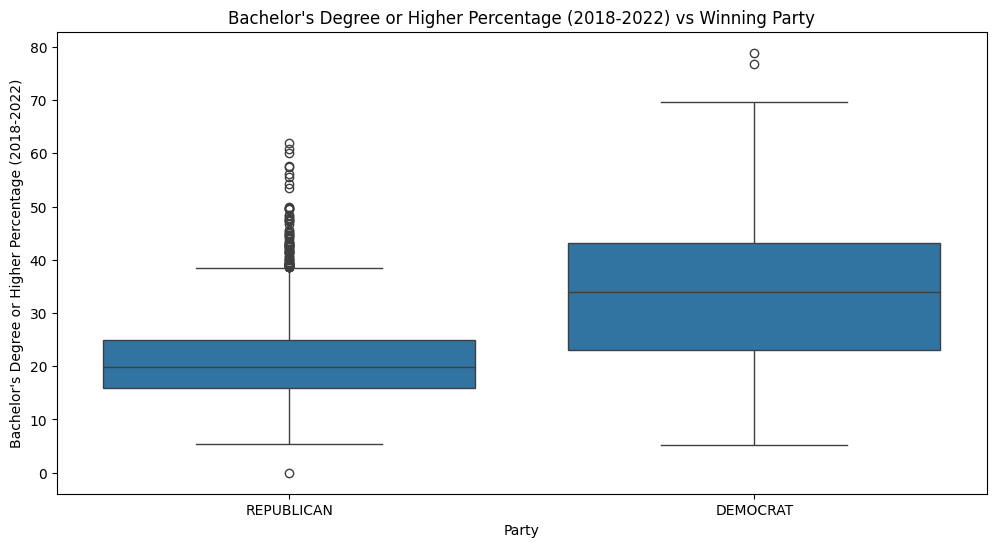

In [ ]:
#Visualizing Bachelor's Degree or Higher Percentage (2018-2022) vs Winning Party
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Party', y="Bachelor's Degree or Higher Percentage (2018-2022)")
plt.title("Bachelor's Degree or Higher Percentage (2018-2022) vs Winning Party")
plt.xlabel('Party')
plt.ylabel("Bachelor's Degree or Higher Percentage (2018-2022)")
plt.show()

The box plot shows us that counties that Democrats have won in tend to have higher percentage of bachelor's degree or higher. The outliers on the republican side show more variability indicating a broader coalition between highly educated and less educated counties.



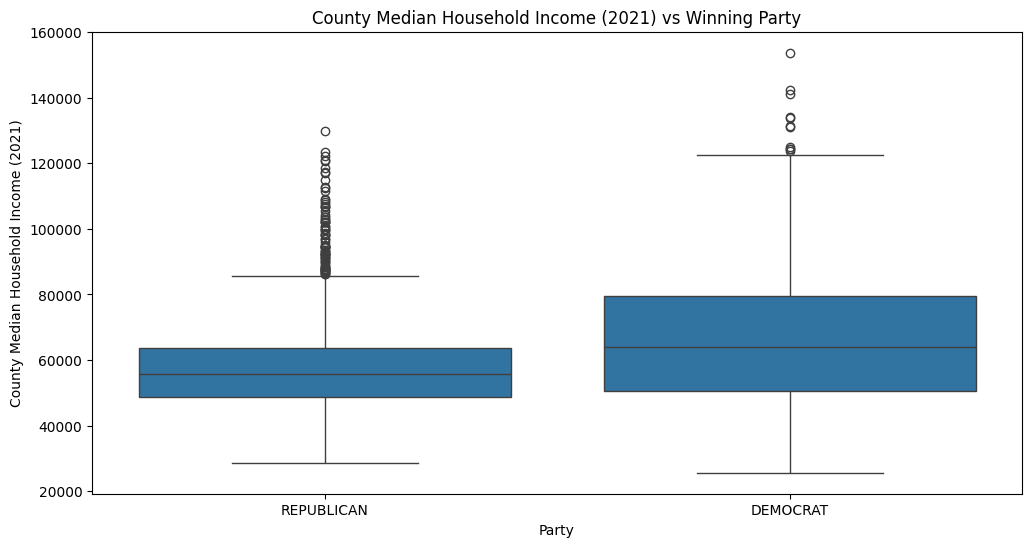

In [ ]:
#Visualizing County Median Household Income (2021) vs Winning Party
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Party', y='County Median Household Income (2021)')
plt.title('County Median Household Income (2021) vs Winning Party')
plt.xlabel('Party')
plt.ylabel('County Median Household Income (2021)')
plt.show()

The medians for both republicans and democrats are similar in this plot but the democrat counties have a broader range of income.

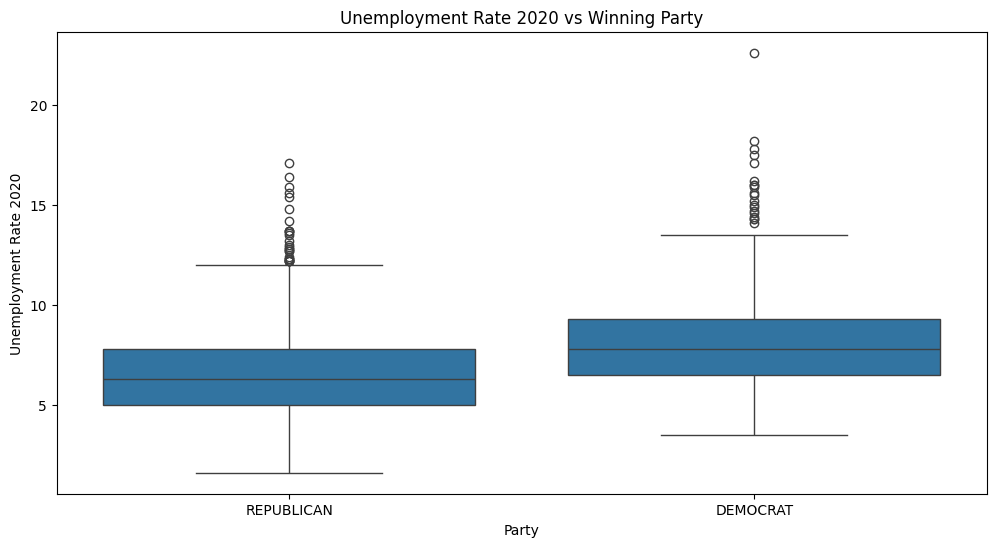

In [ ]:
#Visualizing Unemployment Rate 2020 vs Winning Party
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Party', y='Unemployment Rate 2020')
plt.title('Unemployment Rate 2020 vs Winning Party')
plt.xlabel('Party')
plt.ylabel('Unemployment Rate 2020')
plt.show()

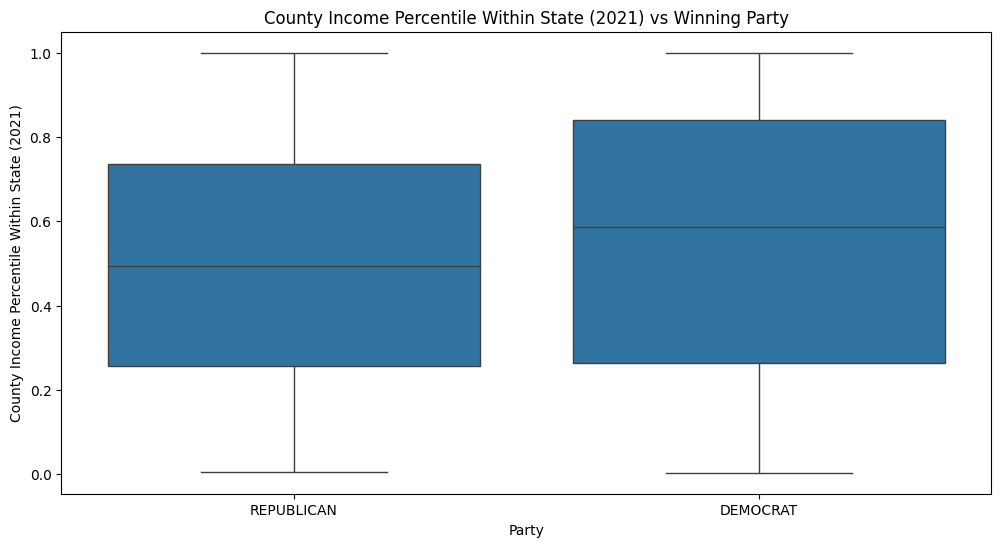

In [ ]:
#Visualizing County Income Percentile Within State (2021) vs Winning Party
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Party',
            y='County Income Percentile Within State (2021)')
plt.title('County Income Percentile Within State (2021) vs Winning Party')
plt.xlabel('Party')
plt.ylabel('County Income Percentile Within State (2021)')
plt.show()

The democratic counties have a slightly higher income percentile within the state than the republicans

# Model Training

## Logistic Regression


In [ ]:
predictors = [
    "County Median Household Income (2021)", "Bachelor's Degree or Higher Percentage (2018-2022)", 'Urban Influence Code 2013', 'Unemployment Rate 2020', 'County Income Percentile Within State (2021)', ]
target = 'Party'

x = df[predictors]
y = df[target]
#splitting data into train/test
x_train, x_temp, y_train, y_temp = train_test_split(
    x, y, test_size=0.5, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(
    x_temp, y_temp, test_size=0.5, random_state=42)



### Unweighted Logistic Regression Model

In [ ]:

x_train_reshape = np.array(x_train)
y_train_reshape = np.array(y_train)

model = LogisticRegression(max_iter=1000)
model.fit(x_train_reshape, y_train_reshape)

LogisticRegression(max_iter=1000)

In [ ]:
x_val_reshape = np.array(x_val)
x_test_reshape = np.array(x_test)

y_pred_train = model.predict(x_train_reshape)
y_pred_val = model.predict(x_val_reshape)

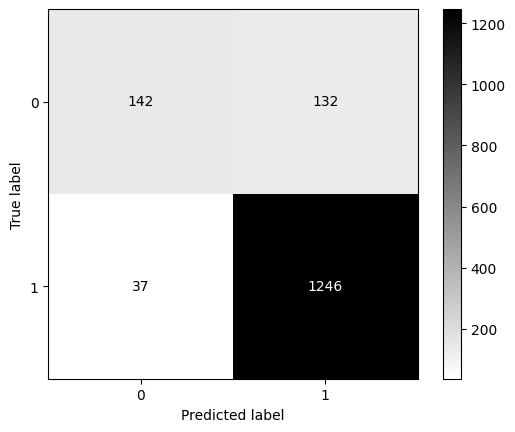

Train Model
Accuracy: 0.8914579319203597
AUC-ROC: 0.886047755317999
Log Loss: 0.2885613880969159
Brier Score: 0.7364726874594886
              precision    recall  f1-score   support

    DEMOCRAT       0.79      0.52      0.63       274
  REPUBLICAN       0.90      0.97      0.94      1283

    accuracy                           0.89      1557
   macro avg       0.85      0.74      0.78      1557
weighted avg       0.88      0.89      0.88      1557



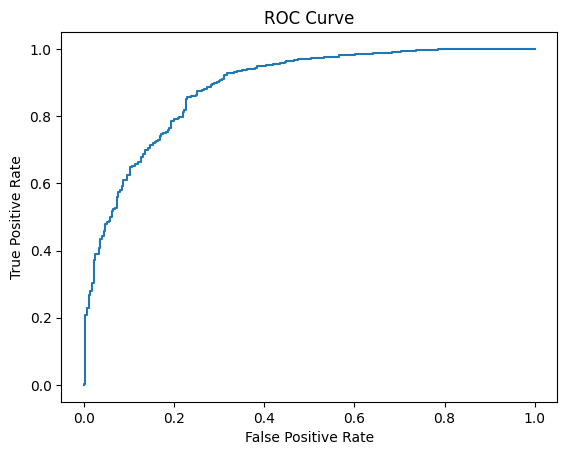

In [ ]:
conf_matrix = metrics.confusion_matrix(y_train.squeeze(), y_pred_train.squeeze())
# Create a visual display of the confusion matrix.
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
# Plot the confusion matrix
conf_matrix_display.plot(cmap = 'binary')
plt.show()
y_pred_proba = model.predict_proba(x_train_reshape)
# Print performance metrics for the training set.
print("Train Model")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"AUC-ROC: {roc_auc_score(y_train, y_pred_proba[:,1])}")
print(f"Log Loss: {log_loss(y_train, y_pred_proba)}")
print(f"Brier Score: {brier_score_loss(y_train, y_pred_proba[:,1],pos_label=1)}")
class_report = metrics.classification_report(y_train, y_pred_train)
print(class_report)
# Encode labels as numeric values for ROC curve calculation.
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve.
fpr, tpr, thresholds = metrics.roc_curve(y_train_numeric, y_pred_proba[:,1])

# Plot the ROC curve to visualize model performance across thresholds.
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

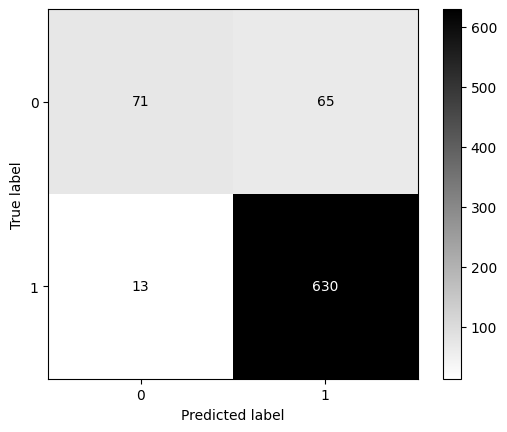

Validation Model
Accuracy: 0.8998716302952503
AUC-ROC: 0.9096720336657214
Log Loss: 0.26480634086888066
Brier Score: 0.7475422635639872
              precision    recall  f1-score   support

    DEMOCRAT       0.85      0.52      0.65       136
  REPUBLICAN       0.91      0.98      0.94       643

    accuracy                           0.90       779
   macro avg       0.88      0.75      0.79       779
weighted avg       0.90      0.90      0.89       779



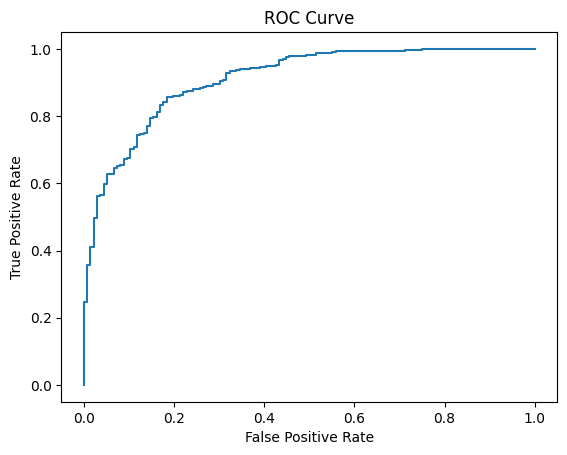

In [ ]:
conf_matrix = metrics.confusion_matrix(y_val.squeeze(), y_pred_val.squeeze())
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
#Plot confusion matrix
conf_matrix_display.plot(cmap = 'binary')
plt.show()

y_pred_proba = model.predict_proba(x_val_reshape)
# Print performance metrics for the validation set.
print("Validation Model")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val)}")
print(f"AUC-ROC: {roc_auc_score(y_val, y_pred_proba[:,1])}")
print(f"Log Loss: {log_loss(y_val, y_pred_proba)}")
print(f"Brier Score: {brier_score_loss(y_val, y_pred_proba[:,1],pos_label=1)}")
# Generate a classification report summarizing precision, recall, F1-score, and support for each class.
class_report = metrics.classification_report(y_val, y_pred_val)
print(class_report)
label_encoder = LabelEncoder()
y_val_numeric = label_encoder.fit_transform(y_val)
# Calculate the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds for the ROC curve.
fpr, tpr, thresholds = metrics.roc_curve(y_val_numeric, y_pred_proba[:,1])
# Plot the ROC curve to visualize model performance across thresholds.
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### Logistic Regression with balanced class weights

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)

#Adjusts the weights of the classes to handle imbalanced datasets, giving more importance to the minority class.
model = LogisticRegression(class_weight="balanced", max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
x_val_reshape = np.array(x_val)
x_test_reshape = np.array(x_test)

y_pred_train = model.predict(x_train_reshape)
y_pred_val = model.predict(x_val_reshape)

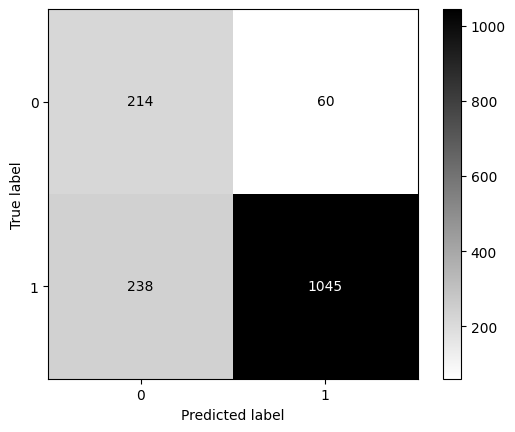

Train Model - Balanced
Accuracy: 0.8086062941554271
AUC-ROC: 0.8868613138686132
Log Loss: 0.4129460927493402
Brier Score: 0.5037552883189663
              precision    recall  f1-score   support

    DEMOCRAT       0.47      0.78      0.59       274
  REPUBLICAN       0.95      0.81      0.88      1283

    accuracy                           0.81      1557
   macro avg       0.71      0.80      0.73      1557
weighted avg       0.86      0.81      0.82      1557



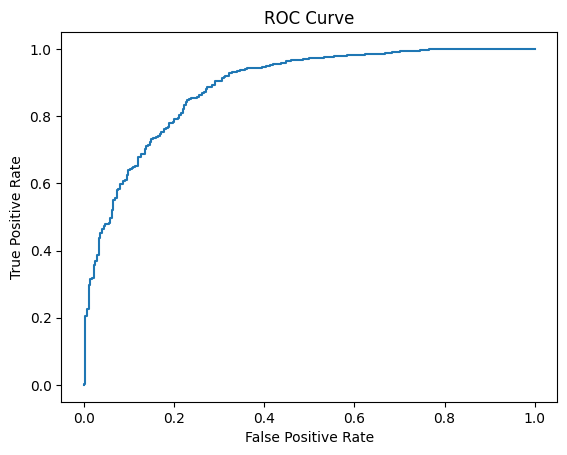

In [ ]:
conf_matrix = metrics.confusion_matrix(y_train.squeeze(), y_pred_train.squeeze())
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot(cmap = 'binary')
plt.show()

y_pred_proba = model.predict_proba(x_train_reshape)
print("Train Model - Balanced")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"AUC-ROC: {roc_auc_score(y_train, y_pred_proba[:,1])}")
print(f"Log Loss: {log_loss(y_train, y_pred_proba)}")
print(f"Brier Score: {brier_score_loss(y_train, y_pred_proba[:,1],pos_label=1)}")
class_report = metrics.classification_report(y_train, y_pred_train)
print(class_report)
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train_numeric, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

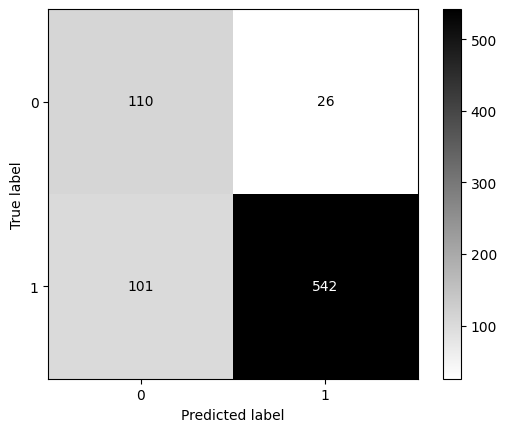

Validation Model - Balanced
Accuracy: 0.8369704749679076
AUC-ROC: 0.9099236117464093
Log Loss: 0.37598248940636203
Brier Score: 0.5158719296547404
              precision    recall  f1-score   support

    DEMOCRAT       0.52      0.81      0.63       136
  REPUBLICAN       0.95      0.84      0.90       643

    accuracy                           0.84       779
   macro avg       0.74      0.83      0.76       779
weighted avg       0.88      0.84      0.85       779



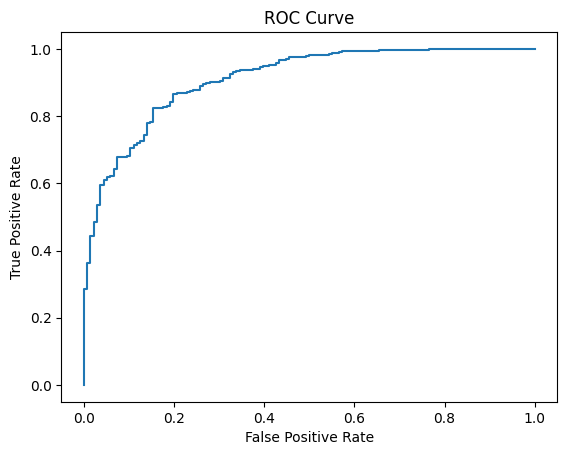

In [ ]:
conf_matrix = metrics.confusion_matrix(y_val.squeeze(), y_pred_val.squeeze())
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot(cmap = 'binary')
plt.show()

y_pred_proba = model.predict_proba(x_val_reshape)
print("Validation Model - Balanced")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val)}")
print(f"AUC-ROC: {roc_auc_score(y_val, y_pred_proba[:,1])}")
print(f"Log Loss: {log_loss(y_val, y_pred_proba)}")
print(f"Brier Score: {brier_score_loss(y_val, y_pred_proba[:,1],pos_label=1)}")
class_report = metrics.classification_report(y_val, y_pred_val)
print(class_report)
label_encoder = LabelEncoder()
y_val_numeric = label_encoder.fit_transform(y_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val_numeric, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


Analysis:
  
Our logistic model that included the class_weight to be balanced performed better with the log score and brier score, compared to the logistic model without the class_weight set to balanced. The precision and recall is also low for both of the models on the validation dataset. This may be because of our dataset, since the majority of the counties in the dataset are Republican. The model that used class_weights set to balanced also hada higher false negative rate compared to the logitstic model without the class_weight set to be balanced.

### Best Logistic Regression Model

In [ ]:
x_train_reshape = np.array(x_train)
y_train_reshape = np.array(y_train)

model = LogisticRegression(max_iter=1000,class_weight="balanced")
model.fit(x_train_reshape, y_train_reshape)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [ ]:
x_test_reshape = np.array(x_test)
y_pred_test = model.predict(x_test_reshape)

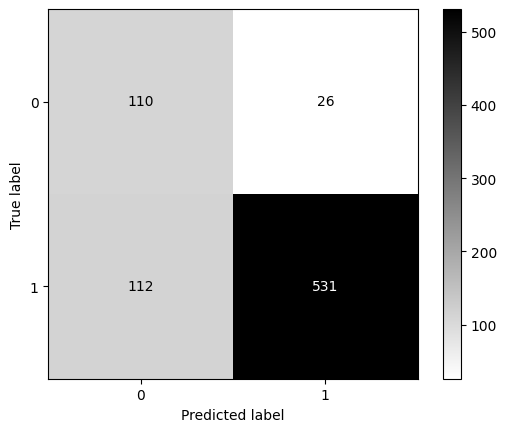

Test Model
Accuracy: 0.8228498074454429
AUC-ROC: 0.8887796176013174
Log Loss: 0.40461864522820934
Brier Score: 0.5096966764230999
              precision    recall  f1-score   support

    DEMOCRAT       0.50      0.81      0.61       136
  REPUBLICAN       0.95      0.83      0.89       643

    accuracy                           0.82       779
   macro avg       0.72      0.82      0.75       779
weighted avg       0.87      0.82      0.84       779



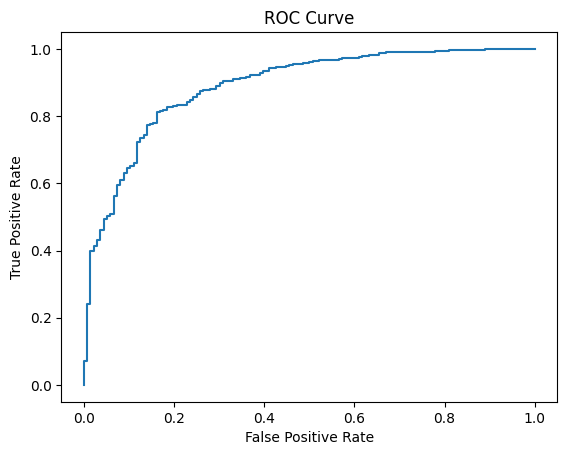

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test.squeeze(), y_pred_test.squeeze())
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot(cmap = 'binary')
plt.show()

y_pred_proba = model.predict_proba(x_test_reshape)
print("Test Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba[:, 1])}")
print(f"Log Loss: {log_loss(y_test, y_pred_proba)}")
print(f"Brier Score: {brier_score_loss(y_test, y_pred_proba[:,1],pos_label=1)}")
class_report = metrics.classification_report(y_test, y_pred_test)
print(class_report)
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test_numeric, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

## Linear Discriminant Analysis

In [ ]:
x_train_reshape = np.array(x_train)
y_train_reshape = np.array(y_train)

model = LDA()
model.fit(x_train_reshape, y_train_reshape)

LinearDiscriminantAnalysis()

In [ ]:
x_val_reshape = np.array(x_val)
x_test_reshape = np.array(x_test)


y_pred_val = model.predict(x_val_reshape)
y_pred_test = model.predict(x_test_reshape)
y_pred_train = model.predict(x_train_reshape)

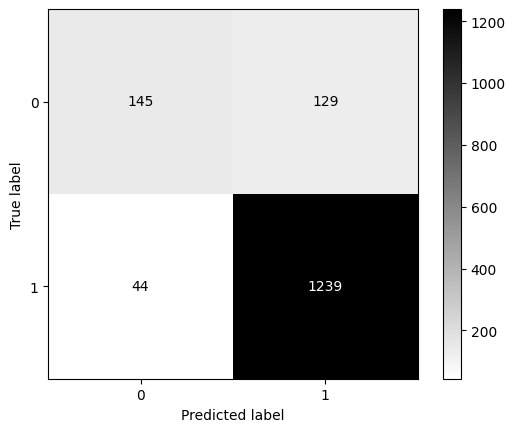

Train Model
Accuracy: 0.8888888888888888
AUC-ROC: 0.8813683713468093
Log Loss: 0.29899697107143114
Brier Score: 0.760731175169739
              precision    recall  f1-score   support

    DEMOCRAT       0.77      0.53      0.63       274
  REPUBLICAN       0.91      0.97      0.93      1283

    accuracy                           0.89      1557
   macro avg       0.84      0.75      0.78      1557
weighted avg       0.88      0.89      0.88      1557



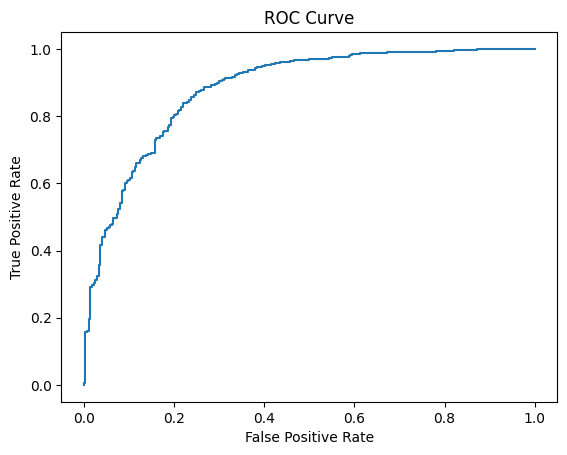

In [ ]:
conf_matrix = metrics.confusion_matrix(
y_train.squeeze(), y_pred_train.squeeze())
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot(cmap='binary')
plt.show()
y_pred_proba = model.predict_proba(x_train_reshape)
print("Train Model")
print(f"Accuracy: {accuracy_score(y_train, y_pred_train)}")
print(f"AUC-ROC: {roc_auc_score(y_train, y_pred_proba[:, 1])}")
print(f"Log Loss: {log_loss(y_train, y_pred_proba)}")
print(f"Brier Score: {brier_score_loss(y_train, y_pred_proba[:,1],pos_label=1)}")
class_report = metrics.classification_report(y_train, y_pred_train)
print(class_report)
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
fpr, tpr, thresholds = metrics.roc_curve(y_train_numeric, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

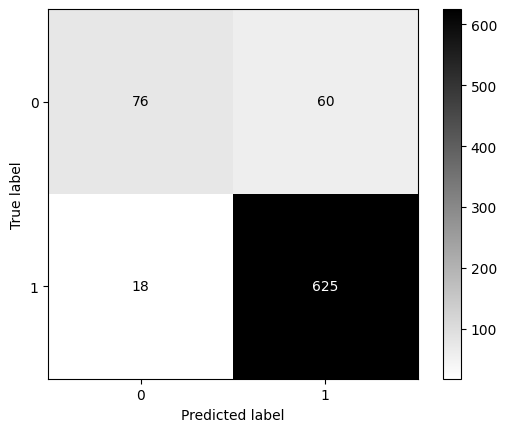

Validation Model
Accuracy: 0.8998716302952503
AUC-ROC: 0.9075221846125697
Log Loss: 0.2630335386511181
Brier Score: 0.7704133913093718
              precision    recall  f1-score   support

    DEMOCRAT       0.81      0.56      0.66       136
  REPUBLICAN       0.91      0.97      0.94       643

    accuracy                           0.90       779
   macro avg       0.86      0.77      0.80       779
weighted avg       0.89      0.90      0.89       779



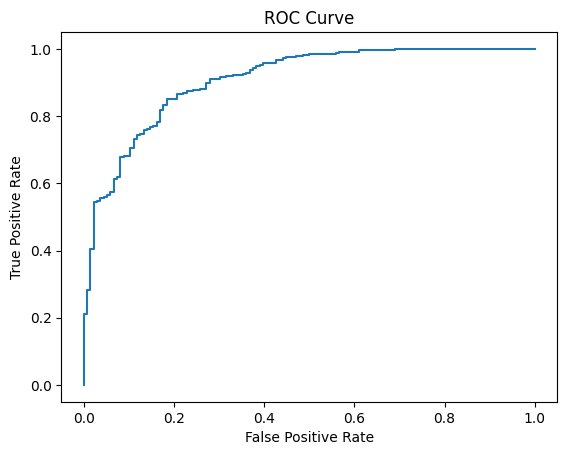

In [ ]:
conf_matrix = metrics.confusion_matrix(y_val.squeeze(), y_pred_val.squeeze())
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot(cmap='binary')
plt.show()

y_pred_proba = model.predict_proba(x_val_reshape)
print("Validation Model")
print(f"Accuracy: {accuracy_score(y_val, y_pred_val)}")
print(f"AUC-ROC: {roc_auc_score(y_val, y_pred_proba[:, 1])}")
print(f"Log Loss: {log_loss(y_val, y_pred_proba)}")
print(f"Brier Score: {brier_score_loss(y_val, y_pred_proba[:,1],pos_label=1)}")
class_report = metrics.classification_report(y_val, y_pred_val)
print(class_report)
label_encoder = LabelEncoder()
y_val_numeric = label_encoder.fit_transform(y_val)
fpr, tpr, thresholds = metrics.roc_curve(y_val_numeric, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

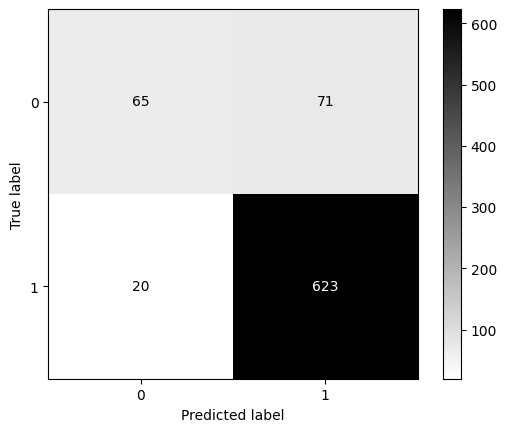

Test Model
Accuracy: 0.883183568677792
AUC-ROC: 0.8891455493550453
Log Loss: 0.29166758645153523
Brier Score: 0.7677977695308899
              precision    recall  f1-score   support

    DEMOCRAT       0.76      0.48      0.59       136
  REPUBLICAN       0.90      0.97      0.93       643

    accuracy                           0.88       779
   macro avg       0.83      0.72      0.76       779
weighted avg       0.87      0.88      0.87       779



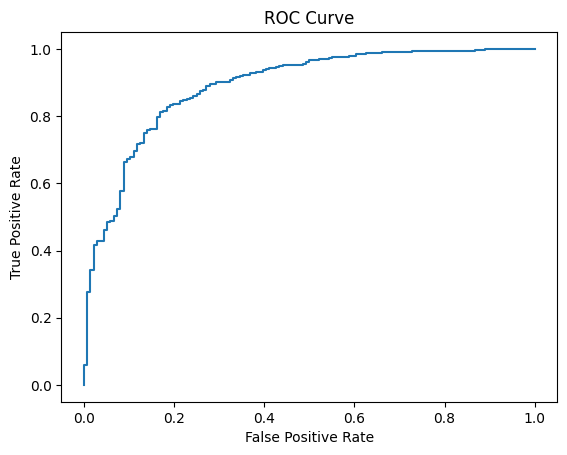

In [ ]:
conf_matrix = metrics.confusion_matrix(y_test.squeeze(), y_pred_test.squeeze())
conf_matrix_display = ConfusionMatrixDisplay(conf_matrix)
conf_matrix_display.plot(cmap='binary')
plt.show()

y_pred_proba = model.predict_proba(x_test_reshape)
print("Test Model")
print(f"Accuracy: {accuracy_score(y_test, y_pred_test)}")
print(f"AUC-ROC: {roc_auc_score(y_test, y_pred_proba[:, 1])}")
print(f"Log Loss: {log_loss(y_test, y_pred_proba)}")
print(f"Brier Score: {brier_score_loss(y_test, y_pred_proba[:,1],pos_label=1)}")
class_report = metrics.classification_report(y_test, y_pred_test)
print(class_report)
label_encoder = LabelEncoder()
y_test_numeric = label_encoder.fit_transform(y_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test_numeric, y_pred_proba[:,1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


## Random Forest Classifier

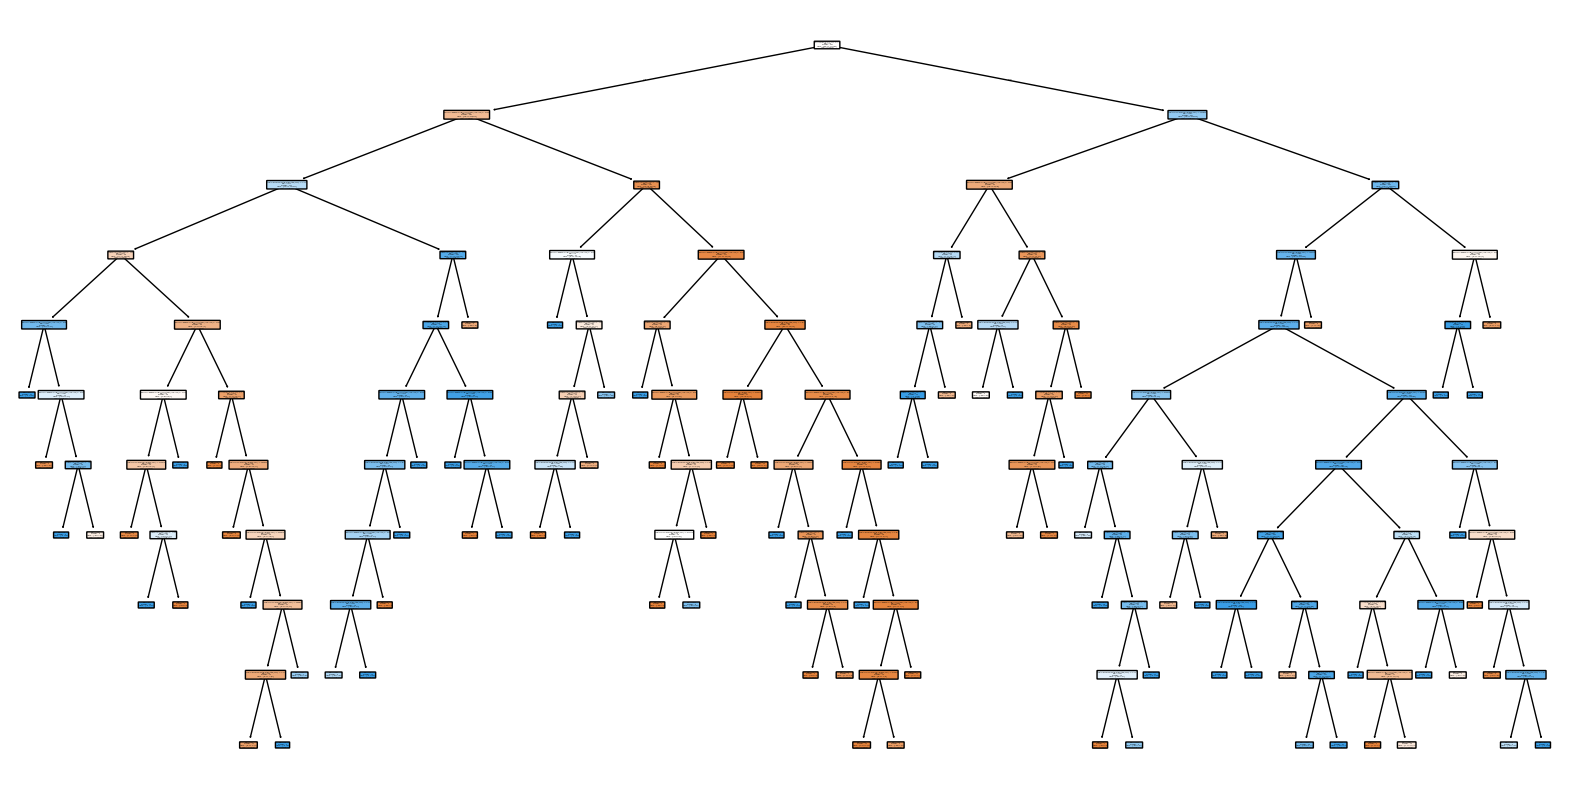

              precision    recall  f1-score   support

    DEMOCRAT       0.63      0.68      0.65       136
  REPUBLICAN       0.93      0.92      0.92       643

    accuracy                           0.87       779
   macro avg       0.78      0.80      0.79       779
weighted avg       0.88      0.87      0.88       779

              precision    recall  f1-score   support

    DEMOCRAT       0.65      0.68      0.67       136
  REPUBLICAN       0.93      0.92      0.93       643

    accuracy                           0.88       779
   macro avg       0.79      0.80      0.80       779
weighted avg       0.88      0.88      0.88       779



In [ ]:
x_train_reshape = np.array(x_train)
y_train_reshape = np.array(y_train)

x_val_reshape = np.array(x_val)
x_test_reshape = np.array(x_test)

rfc = RandomForestClassifier(n_estimators=5, max_depth = 10, min_samples_split=10, random_state = 42, n_jobs = -1, class_weight="balanced")
rfc.fit(x_train_reshape, y_train_reshape)

from sklearn.tree import plot_tree
tree = rfc.estimators_[0]  # Access the first tree in the forest
plt.figure(figsize=(20, 10))  # Adjust figure size as needed
plot_tree(tree, feature_names=predictors, class_names=['Democrat', 'Republican'], filled=True, rounded=True)
plt.show()

yhat_rfc_val = rfc.predict(x_val_reshape)
class_report = metrics.classification_report(y_val, yhat_rfc_val)
print(class_report)

yhat_rfc_test = rfc.predict(x_test_reshape)
class_report = metrics.classification_report(y_test, yhat_rfc_test)
print(class_report)

# yhat_rfc_test = rfc.predict(x_test)
# class_report = metrics.classification_report(y_test, yhat_rfc_test)
# print(class_report)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Hyperparameters found by RandomizedSearchCV:
{'class_weight': None, 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 8, 'min_samples_split': 15, 'n_estimators': 379}
Classification Report on Test Data:
              precision    recall  f1-score   support

    DEMOCRAT       0.72      0.54      0.62       136
  REPUBLICAN       0.91      0.96      0.93       643

    accuracy                           0.88       779
   macro avg       0.81      0.75      0.77       779
weighted avg       0.87      0.88      0.88       779



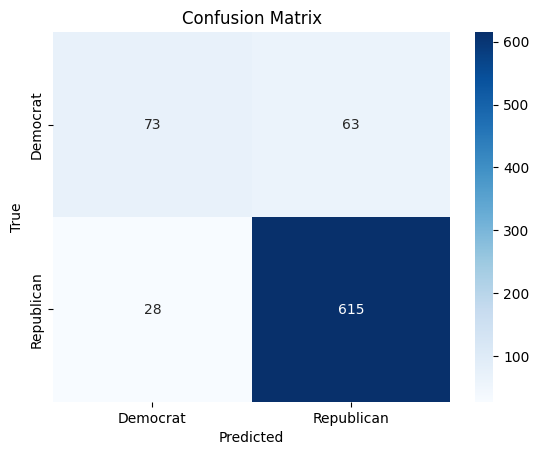

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


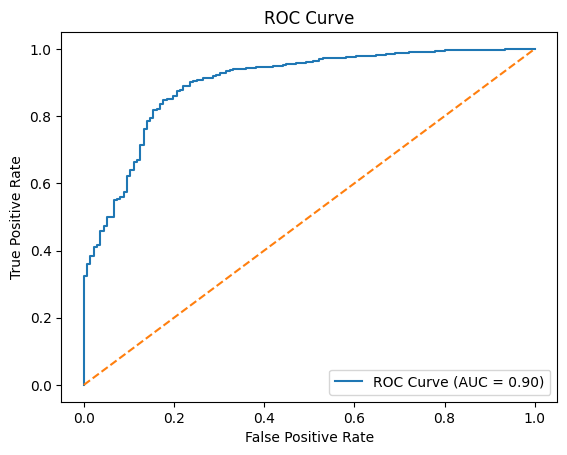

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Test Random Forest Brier Score: 0.7469650710542401
Test Random Forest Log Loss: 0.2823431553694072
Validation Random Forest Brier Score: 0.7496104611900175
Validation Random Forest Log Loss: 0.27660500783875264


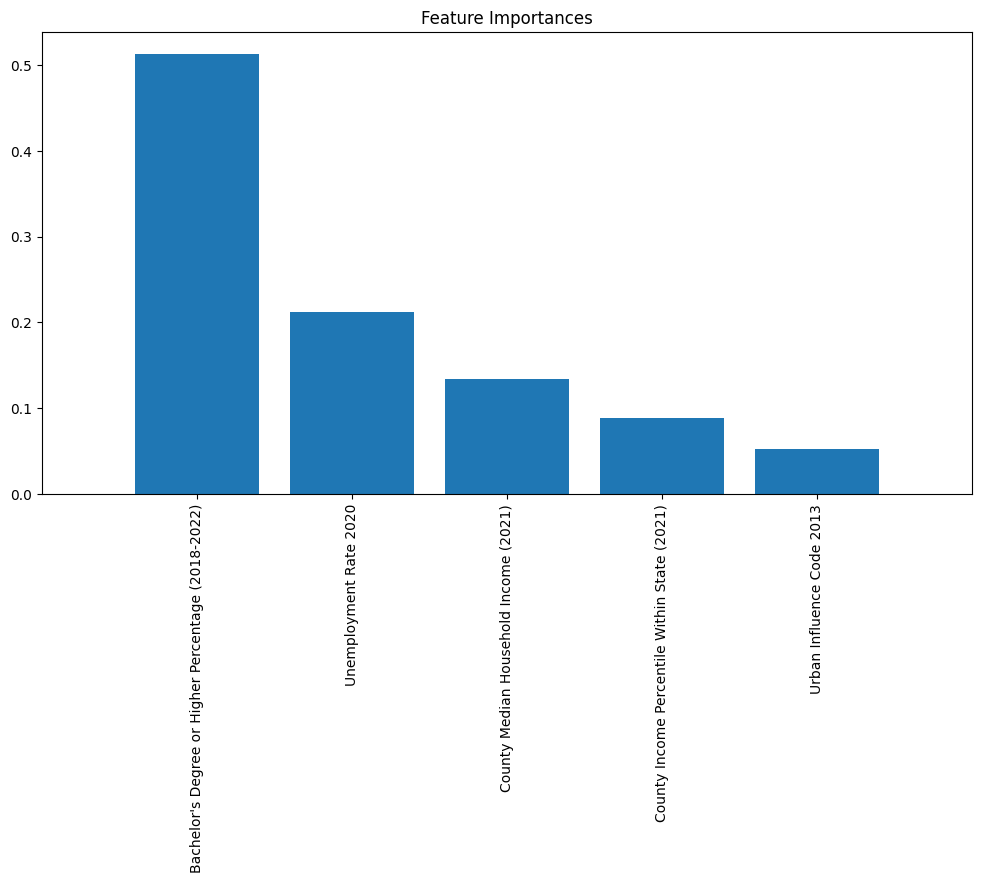

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import randint, uniform
from sklearn.preprocessing import LabelEncoder

x_train_reshape = np.array(x_train)
y_train_reshape = np.array(y_train)

x_val_reshape = np.array(x_val)
x_test_reshape = np.array(x_test)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': randint(100, 500),  # Randomly choose the number of trees between 100 and 500
    'max_depth': [5, 10, 15, None],  # Depth of trees to search
    'min_samples_split': randint(2, 20),  # Randomly choose the number of samples required to split a node
    'min_samples_leaf': randint(1, 10),  # Randomly choose the number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None],  # Number of features to consider when splitting
    'class_weight': ['balanced', None]  # Handle imbalanced classes
}

# Initialize the RandomForestClassifier
rfc = RandomForestClassifier(random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV with cross-validation
random_search = RandomizedSearchCV(estimator=rfc, param_distributions=param_dist,
                                   n_iter=100, cv=3, n_jobs=-1, verbose=2,
                                   random_state=42, scoring='accuracy')

# Fit the RandomizedSearchCV on the training data
random_search.fit(x_train, y_train)

# Print the best parameters found by RandomizedSearchCV
print("Best Hyperparameters found by RandomizedSearchCV:")
print(random_search.best_params_)

# Use the best estimator found by the random search
best_rfc = random_search.best_estimator_

# Fit the best model on the full training data
best_rfc.fit(x_train_reshape, y_train_reshape)

# Evaluate the model on the test data
yhat_rfc_test = best_rfc.predict(x_test_reshape)
print("Classification Report on Test Data:")
print(classification_report(y_test, yhat_rfc_test))

# Confusion Matrix for the test data
cm = confusion_matrix(y_test, yhat_rfc_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Democrat', 'Republican'], yticklabels=['Democrat', 'Republican'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Convert y_test and y_train to numeric labels
label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)  # Fit and transform y_train
y_test_numeric = label_encoder.transform(y_test)  # Transform y_test using the same encoder

# ROC AUC Score and Curve for the test data
yhat_rfc_test_prob = best_rfc.predict_proba(x_test)[:, 1]
roc_auc = roc_auc_score(y_test_numeric, yhat_rfc_test_prob)
fpr, tpr, _ = roc_curve(y_test_numeric, yhat_rfc_test_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#log and brier score
yhat_rfc_test_prob = np.array(best_rfc.predict_proba(x_test))
yhat_rfc_val_prob = np.array(best_rfc.predict_proba(x_val))

from sklearn.metrics import brier_score_loss, log_loss

# Assuming 'y_test' is your true target variable values for the test set
y_test_np = np.array(y_test)
# Calculate Brier score
brier_score_rf = brier_score_loss(y_test_np, yhat_rfc_test_prob[:,1], pos_label=1)
print(f"Test Random Forest Brier Score: {brier_score_rf}")
# Calculate Log loss
log_loss_rf = log_loss(y_test_np, yhat_rfc_test_prob)
print(f"Test Random Forest Log Loss: {log_loss_rf}")

y_val_np = np.array(y_val)
brier_score_rf = brier_score_loss(y_val_np, yhat_rfc_val_prob[:,1], pos_label=1)
print(f"Validation Random Forest Brier Score: {brier_score_rf}")
# Calculate Log loss
log_loss_rf = log_loss(y_val_np, yhat_rfc_val_prob)
print(f"Validation Random Forest Log Loss: {log_loss_rf}")


# Feature Importances
importances = best_rfc.feature_importances_
indices = importances.argsort()[::-1]
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(x_train.shape[1]), importances[indices], align="center")
plt.xticks(range(x_train.shape[1]), [predictors[i] for i in indices], rotation=90)
plt.xlim([-1, x_train.shape[1]])
plt.show()


## Gaussian Naive Bayes

Classification Report on Test Data:
              precision    recall  f1-score   support

    DEMOCRAT       0.65      0.46      0.53       136
  REPUBLICAN       0.89      0.95      0.92       643

    accuracy                           0.86       779
   macro avg       0.77      0.70      0.73       779
weighted avg       0.85      0.86      0.85       779



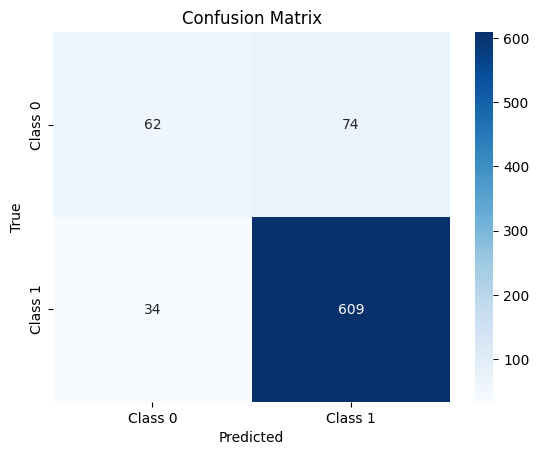

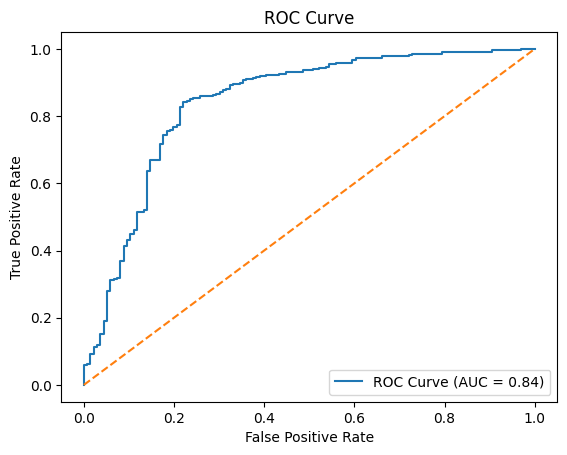


Log Loss: 0.3993
Brier Score: 0.1026
                                             Feature  Mutual Information
1  Bachelor's Degree or Higher Percentage (2018-2...            0.090333
0              County Median Household Income (2021)            0.060100
2                          Urban Influence Code 2013            0.056171
3                             Unemployment Rate 2020            0.048091
4       County Income Percentile Within State (2021)            0.005181


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import numpy as np


x_train_reshape = np.array(x_train)
y_train_reshape = np.array(y_train)

x_test_reshape = np.array(x_test)

nb = GaussianNB()

nb.fit(x_train_reshape, y_train_reshape)

yhat_nb_test = nb.predict(x_test_reshape)
print("Classification Report on Test Data:")
print(classification_report(y_test, yhat_nb_test))

cm = confusion_matrix(y_test, yhat_nb_test)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

label_encoder = LabelEncoder()
y_train_numeric = label_encoder.fit_transform(y_train)
y_test_numeric = label_encoder.transform(y_test)

yhat_nb_test_prob = nb.predict_proba(x_test_reshape)[:, 1]
roc_auc = roc_auc_score(y_test_numeric, yhat_nb_test_prob)
fpr, tpr, _ = roc_curve(y_test_numeric, yhat_nb_test_prob)

plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

print()

logloss = log_loss(y_test_numeric, yhat_nb_test_prob)
print(f"Log Loss: {logloss:.4f}")

brier_score = brier_score_loss(y_test_numeric, yhat_nb_test_prob)
print(f"Brier Score: {brier_score:.4f}")

from sklearn.feature_selection import mutual_info_classif
import pandas as pd

mutual_info = mutual_info_classif(x_train_reshape, y_train_reshape)

mutual_info_df = pd.DataFrame({
    'Feature': predictors,
    'Mutual Information': mutual_info
})

mutual_info_df = mutual_info_df.sort_values(by='Mutual Information', ascending=False)

print(mutual_info_df)



We used Permutation Feature Importance to analyze the importance of the model's features. This method evaluates the impact of each feature on model performance by shuffling its values and observing how the model's accuracy changes.

# Model Comparison and Evaluation

In our analysis, the Naive Bayes classifier was selected primarily due to its significantly better Brier score, which indicates a more reliable calibration of predicted probabilities compared to other models. The Brier score is a measure of how accurately the model's predicted probabilities match the actual outcomes. A lower Brier score suggests that the model’s predictions are not only accurate in terms of classifying the correct outcomes but also well-calibrated, meaning the predicted probabilities are more representative of the true likelihood of an event. This is particularly important in our case, as we are interested in understanding the probability of a county voting for a particular party, which requires both accurate classification and well-calibrated probabilities.


In this case, Naive Bayes had the lowest Brier score of 0.10, which is notably better than the other models, such as Logistic Regression and Random Forest, whose Brier scores were higher (around 0.74 to 0.76). This lower Brier score demonstrates that Naive Bayes produced more reliable probability estimates, making it a better fit for our classification task. The Brier score was prioritized over other metrics like accuracy, AUC, and log loss because it provides a direct measure of how well-calibrated the predicted probabilities are. While accuracy and AUC are important for understanding model performance, Brier score is crucial for assessing how well the model's predicted probabilities reflect the true likelihood of an event, which is essential for interpreting the data probabilistically.


This aligns with our hypotheses regarding the role of features like urban influence and median income in predicting voting patterns. Urbanization and income are known to have a significant influence on voting behavior, and Naive Bayes allows us to interpret this relationship probabilistically. By providing better-calibrated probability scores, it allows for a clearer understanding of how much influence variables like urbanization and income truly have on the likelihood of a county voting for a particular party. The simplicity of Naive Bayes also makes it easier to interpret these features' contributions to predictions. For example, Naive Bayes computes the conditional probability of each feature (urbanization, income) given the class (party), which gives us insight into how much each feature influences the final prediction.


The Naive Bayes model can give us more confidence in these probabilistic predictions, which are essential for understanding the nuanced factors that drive voting patterns in different counties. The ability to interpret how each feature influences predictions in a probabilistic manner aligns with the focus of our analysis: understanding the relationship between urbanization, median income, and voting behavior.


In other metrics such as Accuracy, Recall, Precision, AUC, F1 Score, and log loss, Naive Bayes slightly underperforms compared to the other models. This made us consider models like Random Forest, which had the highest AUC and lowest log loss. However, considering the data and the goal of the model, we decided that the considerable difference in Brier score made Naive Bayes the better choice. The ability to produce reliable, well-calibrated probabilities that align closely with the real-world outcomes we were predicting was more important for understanding how urbanization and income influence voting behavior.


So, the lower Brier score of Naive Bayes made it the best choice for this analysis, because it provided not only accurate predictions but also well-calibrated probabilities, which were essential for interpreting the real-world factors driving voting patterns


# Conclusions and Implications

Bachelor’s Degree or Higher Percentage emerged as the most influential feature in predicting voting behavior. Counties with a higher percentage of residents with a bachelor’s degree exhibited stronger political leanings that contributed most significantly to the model's ability to predict whether a county votes Democrat or Republican. This suggests that education levels are strongly linked to political affiliation.

County Median Household Income also played an important role in shaping voting patterns, though its importance was slightly lower than education levels. This implies that income levels contribute to voting preferences, with wealthier counties potentially leaning toward one party and lower-income counties favoring another.

Urban Influence Code ranked as the third most important factor, highlighting the role that urbanization plays in voting behavior. Although not as dominant as education and income, the urban-rural divide still contributed to distinguishing between Democratic and Republican counties, confirming that geographic factors, such as urban influence, affect voting patterns.

Unemployment Rate and County Income Percentile emerged as less significant features in comparison. Although they had some impact on the model's predictions, their contribution to explaining voting behavior was relatively small.

Our hypotheses are somewhat supported by the feature importance data.

The final model's results confirm that Naive Bayes is well-calibrated for our classification task, providing reliable probability estimates. Although other models like Logistic Regression and Random Forest performed well in terms of accuracy and AUC, Naive Bayes' exceptional Brier score makes it the most appropriate choice for this analysis, as it emphasizes the importance of well-calibrated probabilities. The model's simplicity and its probabilistic interpretation make it an excellent tool for understanding how features such as income and urbanization influence voting outcomes, offering a clear connection to our hypotheses.

**Future Work**

One area for future work would be to explore how other demographic factors, such as education levels or race, could impact voting behavior. Additionally, considering the effect of regional trends over time could help enhance model accuracy and provide deeper insights into electoral dynamics. Another question that could be explored is if specific regions have different predictors that have more importance.

**Limitations and Improvements**

A limitation of this analysis is the relatively small set of predictors used to model voting behavior. While variables like median household income and urban influence are important, incorporating additional features—such as age and race—could provide a more comprehensive view of the factors influencing voting patterns. Moreover, expanding the dataset to include more counties or data from multiple election cycles could help account for regional or temporal variations in voting behavior, potentially improving model accuracy and generalizability. Because our dataset contains mostly Republican counties, our precision and recall for the Democrat class if low. By enriching the dataset with more predictors and a broader range of data, future analyses could offer deeper insights into the complexities of electoral outcomes.


<ipython-input-37-956c27d96c92>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


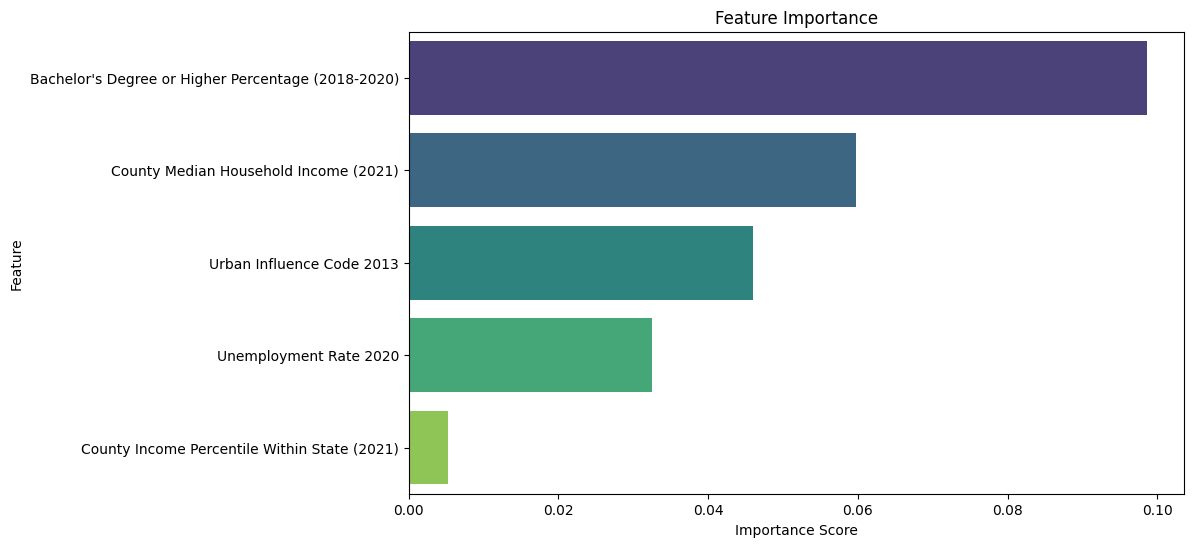

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dataframe with feature names and importance scores
feature_importance_df = pd.DataFrame({
    'Feature': ['Bachelor\'s Degree or Higher Percentage (2018-2020)',
                'County Median Household Income (2021)',
                'Urban Influence Code 2013',
                'Unemployment Rate 2020',
                'County Income Percentile Within State (2021)'],
    'Importance': [0.098587, 0.059731, 0.045931, 0.032457, 0.005196]
})

# Plot the importance scores
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()
